# Astroplan Plotting Examples - Parallactic Angle vs Time

To generate parallactic angle vs. time plots with `Astroplan`, use the `plot_parallactic` function.  

This function takes, at minimum, a `Target`, an `Observer` and a `Time` object as input.  
Optional arguments include an `Axes` object and a style dictionary.  

`plot_parallactic` will return an `Axes` object that contains parallactic angle data for the window of time specified by the `Time` object passed in.  You can further manipulate the returned `Axes` object, or simply print the plot to your display or save it as a file. 

## Passing in a Time object with just one time.

Any plot function in `Astroplan` with a time-based axis will allow you to pass in a scalar `Time` object (one that has a length of 1).  If you do this, the plotting function will internally populate a `Time` object with a window centered around the time you passed in, and use that set of times to generate parallactic angles.

/home/jazmin/da_codes/gsoc2015/astroplan-jaz/astroplan/build/lib.linux-x86_64-3.4/astroplan/plots/plots.py:165: RuntimeWarning: invalid value encountered in arcsin
  parallactic_angle = np.arcsin(numerator/denominator)


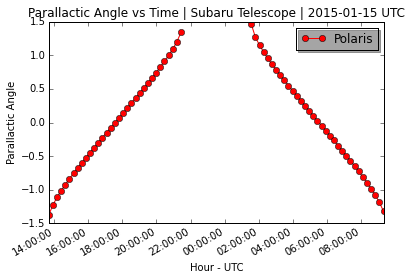

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
from pytz import timezone
from astropy.time import Time

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_parallactic

# Set up Observer, Target and observation time objects. 
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

observer = Observer(name='Subaru Telescope',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               timezone=timezone('US/Hawaii'),
               description="Subaru Telescope on Mauna Kea, Hawaii")

coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
target = FixedTarget(name='Polaris', coord=coordinates)

observe_time = Time('2015-01-15 23:30:00')

plot_parallactic(target, observer, observe_time)
plt.show()

## Passing in a Time object with multiple times.

If you want create a `Time` object centered on a particular instant in time (such as the example above), but you want more control over precision than our default settings allow, you can use `numpy.linspace()` in conjunction with `astropy.units`.

/home/jazmin/da_codes/gsoc2015/astroplan-jaz/astroplan/build/lib.linux-x86_64-3.4/astroplan/plots/plots.py:165: RuntimeWarning: invalid value encountered in arcsin
  parallactic_angle = np.arcsin(numerator/denominator)


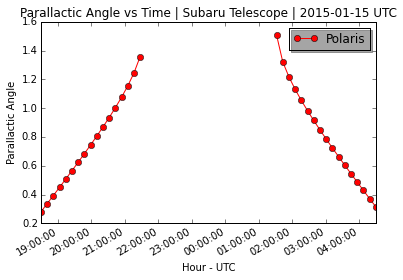

In [10]:
import numpy as np

observe_time = Time('2015-01-15 23:30:00')
observe_time = observe_time + np.linspace(-5, 5, 55)*u.hour

plot_parallactic(target, observer, observe_time)
plt.show()

If you know the start and end times of your observation run, you can use a `DeltaTime` object to populate the `Time` object.

/home/jazmin/da_codes/gsoc2015/astroplan-jaz/astroplan/build/lib.linux-x86_64-3.4/astroplan/plots/plots.py:165: RuntimeWarning: invalid value encountered in arcsin
  parallactic_angle = np.arcsin(numerator/denominator)


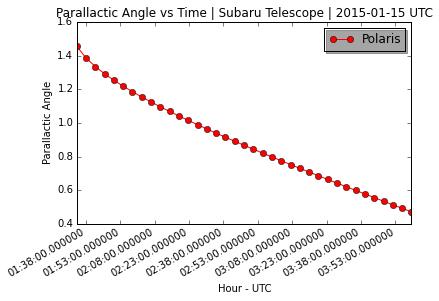

In [11]:
start_time = Time('2015-01-15 23:00:00')
end_time = Time('2015-01-16 04:00:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 75)

plot_parallactic(target, observer, observe_time)
plt.show()

## Plotting parallactic angles for multiple targets.

You may want to plot parallactic angle information for multiple targets. 

In this case, you can simply take the `Axes` object returned by `plot_parallactic`, and feed it back to the function, using a different `Target` object as input this time.  Repeat until you have as many targets on the plot as you wish.

/home/jazmin/da_codes/gsoc2015/astroplan-jaz/astroplan/build/lib.linux-x86_64-3.4/astroplan/plots/plots.py:165: RuntimeWarning: invalid value encountered in arcsin
  parallactic_angle = np.arcsin(numerator/denominator)


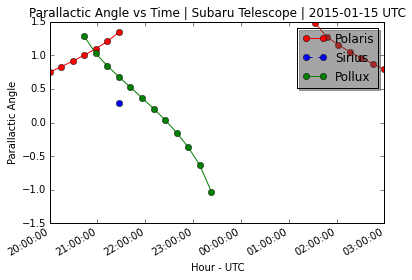

In [12]:
coordinates = SkyCoord('06h45m08.9173s', '-16d42m58.017s', frame='icrs')
other_target = FixedTarget(name='Sirius', coord=coordinates)

coordinates = SkyCoord('07h45m19.4s', '+28d01m35s', frame='icrs')
third_target = FixedTarget(name='Pollux', coord=coordinates)

observe_time = Time('2015-01-15 23:30:00') + np.linspace(-3.5, 3.5, 30)*u.hour

sirius_styles = {'linestyle': '--', 'color': 'b'}
pollux_styles = {'linestyle': '-', 'color': 'g'}

plot_parallactic(target, observer, observe_time)
plot_parallactic(other_target, observer, observe_time, style_kwargs=sirius_styles)
plot_parallactic(third_target, observer, observe_time, style_kwargs=pollux_styles)

plt.show()

## Changing style options.

You can change the `linestyle` and `color` properties of any data set by setting the `style_kwargs` option. See [Plotting parallactic angles for multiple targets](http://localhost:8888/notebooks/examples/plotting_examples--parallactic_angle.ipynb#Plotting-parallactic-angles-for-multiple-targets.) above.

You can also set a dark background and light axes, ticks, labels, etc.

In [13]:
#plot_parallactic(observer, target, time, dark_plot=True)

#plt.show()